In [ ]:
import matplotlib.pyplot as plt
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



make_blobs() returns a tuple of two values:

A two-dimensional NumPy array with the x- and y-values for each of the samples
A one-dimensional NumPy array containing the cluster labels for each sample

#Make blobs

In [ ]:
features, true_labels = make_blobs(
n_samples=300,
centers=4,
cluster_std=0.60,
random_state=0
)

In [ ]:
features[:10]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207],
       [ 3.43761754,  0.26165417],
       [-1.80822253,  1.59701749],
       [ 1.41372442,  4.38117707],
       [-0.20493217,  8.43209665],
       [-0.71109961,  8.66043846]])

In [ ]:
true_labels[:10]

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3])

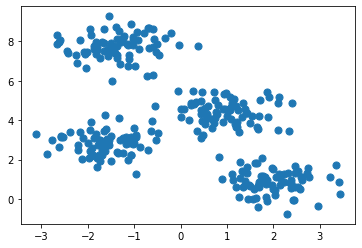

In [ ]:
plt.scatter(features[:,0], features[:,1] , s=50)

##WSS score for elbow method

In [ ]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [ ]:
features[:5]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207]])

In [ ]:
kmax = 10
points = features
calculate_WSS(points, kmax)

[1190.782359364345,
 546.8911504626301,
 212.00599621083475,
 188.8298596631843,
 170.74650631623723,
 152.55764759252233,
 136.2093636805517,
 123.84720726272388,
 112.29326074624186]

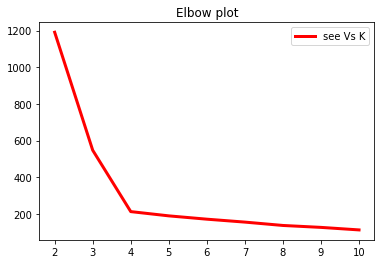

In [ ]:
sse = [1190.782359364345,
 546.8911504626301,
 212.00599621083475,
 188.77323556773717,
 170.66626309814242,
 154.73013227312447,
 136.40817056004119,
 125.87981147299647,
 112.091761751831]
K = [2,3,4,5,6,7,8,9,10]
plt.plot(K, sse, 'r-', lw=3, label="see Vs K")
plt.title("Elbow plot")
plt.legend()

##silhouette_score for silhouette method

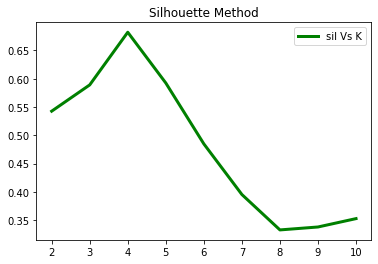

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(features)
  labels = kmeans.labels_
  sil.append(silhouette_score(features, labels, metric = 'euclidean'))

K = [2,3,4,5,6,7,8,9,10]
plt.plot(K, sil, 'g-', lw=3, label="sil Vs K")
plt.title("Silhouette Method")
plt.legend()



##Normalizing the features

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(features)
X[:5]

array([[ 0.51625508, -0.70722723],
       [-0.86166376,  1.3290677 ],
       [ 0.71117444,  0.43704896],
       [-0.61979222,  1.48557283],
       [ 0.78228231, -0.8013784 ]])

##Applying Kmeans clustering

In [ ]:
kmeans = KMeans(
init="random",
n_clusters=4,
n_init=10,
max_iter=300,
random_state=0
)

init controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

n_clusters sets k for the clustering step. This is the most important parameter for k-means.

n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.

In [ ]:
kmeans.fit(X)

KMeans(init='random', n_clusters=4, random_state=0)

In [ ]:
kmeans.inertia_

56.0247705750995

In [ ]:
kmeans.cluster_centers_

array([[-0.83691948,  1.46193015],
       [ 0.58536699,  0.17425154],
       [ 1.21774671, -1.19712077],
       [-0.96619422, -0.43906093]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

6

In [ ]:
kmeans.labels_[:5]

array([2, 0, 1, 0, 2], dtype=int32)

In [ ]:
y_kmeans = kmeans.predict(X)
y_kmeans[:5]

array([2, 0, 1, 0, 2], dtype=int32)

##Visualizing the results

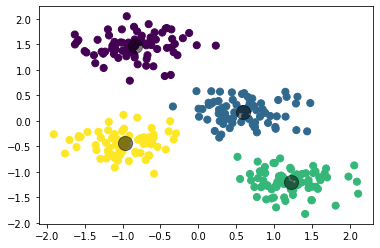

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);